<a href="https://colab.research.google.com/github/RockAfeller2013/kalijupiter/blob/main/GOAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Tools

# Setup Target Varaibles

# Reconnaissance

> Always save your results for later analysie, create libary for later use and name each text tile. Then use all of the outputs to creat a report.

Once the variables have been setup, you can Runtime, Run All to create the report.

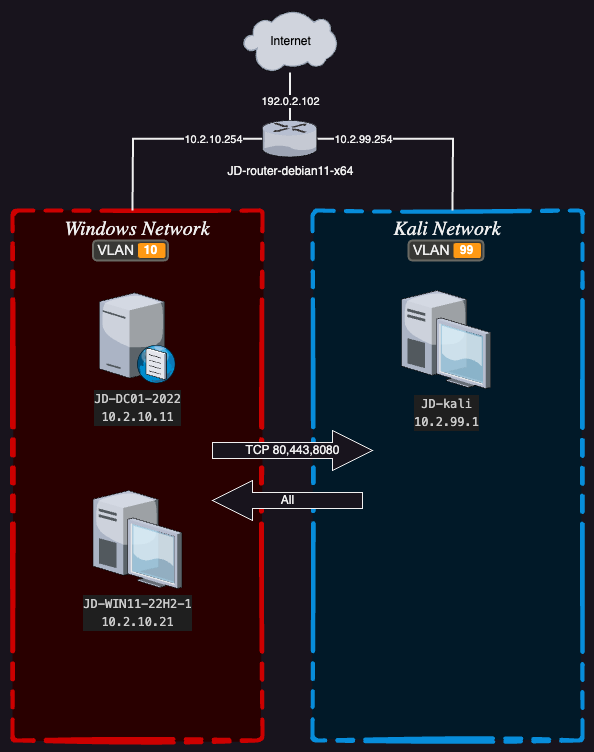

Example

https://github.com/obheda12/JupyterPen/blob/main/OSINT/Jupyter_OSINT.ipynb

## Set Defaults



In [ ]:
from datetime import datetime

now = datetime.now()

start_time = now.strftime("%H:%M:%S")
print("Start Time =", start_time)

In [ ]:
#Set DOMAIN & FOLDER_NAME Variable
DOMAIN = "example.com"
ORG_NAME = "example"
FOLDER_NAME = "example"
!mkdir $FOLDER_NAME

In [ ]:
print("The Following variables have been set:")
print("")
print("DOMAIN NAME: " + DOMAIN)
print("FOLDER NAME: " + FOLDER_NAME)
print("")

## Network Discovery

In [ ]:
for i in {1..255}; do ping -c 1 10.2.10.$i | grep "bytes from" | cut -d " " -f 4 | tr -d ":" & done

In [ ]:
# Ping Sweep (Identify live hosts):

for i in {1..255}; do ping -c 1 10.2.10.$i | grep "bytes from" | cut -d " " -f 4 | tr -d ":" & done

In [ ]:
# Scan for Open Ports (using nmap):

nmap -sP 192.168.1.0/24
nmap -p- -sCV -sS -T4 192.168.1.1 -vv
nmap -sS -n -Pn -p 80,443 -iL target.txt -oA web_result -vvv —open
nmap -sV -p- 192.168.1.1
nmap -sV -p- 192.168.1.1 -oN nmap_scan.txt

## Netbios  Enumeration



In [ ]:
cme smb 192.168.56.1/24

## SMB Enumeration


In [ ]:
# List SMB Shares (using smbclient):

smbclient -L //192.168.1.1 -N

In [ ]:
# Check for Null Session Vulnerability (using rpcclient):

rpcclient -U "" 192.168.1.1


In [ ]:
# Enumerate SMB Users (using enum4linux):

enum4linux -U 192.168.1.1

## AD Username and password list from Website

In [ ]:
usage: linkedin2username.py [-h] -c COMPANY [-n DOMAIN] [-d DEPTH]
  [-s SLEEP] [-x PROXY] [-k KEYWORDS] [-g] [-o OUTPUT]

OSINT tool to generate lists of probable usernames from a given company's LinkedIn page.
This tool may break when LinkedIn changes their site.
Please open issues on GitHub to report any inconsistencies.

optional arguments:
  -h, --help            show this help message and exit
  -c COMPANY, --company COMPANY
                        Company name exactly as typed in the company linkedin profile page URL.
  -n DOMAIN, --domain DOMAIN
                        Append a domain name to username output.
                        [example: "-n targetco.com" would output jschmoe@targetco.com]
  -d DEPTH, --depth DEPTH
                        Search depth (how many loops of 25). If unset, will try to grab them
                        all.
  -s SLEEP, --sleep SLEEP
                        Seconds to sleep between search loops. Defaults to 0.
  -x PROXY, --proxy PROXY
                        Proxy server to use. WARNING: WILL DISABLE SSL VERIFICATION.
                        [example: "-p https://localhost:8080"]
  -k KEYWORDS, --keywords KEYWORDS
                        Filter results by a a list of command separated keywords.
                        Will do a separate loop for each keyword,
                        potentially bypassing the 1,000 record limit.
                        [example: "-k 'sales,human resources,information technology']
  -g, --geoblast        Attempts to bypass the 1,000 record search limit by running
                        multiple searches split across geographic regions.
  -o OUTPUT, --output OUTPUT
                        Output Directory, defaults to li2u-output

In [ ]:
# Create Username list from LinkedIn


https://github.com/initstring/linkedin2username
linkedin2username.py -c targetco -d 5 -n 'targetco.com'

## LDAP Enumeration

In [ ]:
ldapsearch -x -h 192.168.1.1 -b "DC=domain,DC=com" -s sub "(objectClass=*)" > ldap_dump.txt

In [ ]:
# Extract Users from LDAP:

ldapsearch -x -h 192.168.1.1 -b "DC=domain,DC=com" "(objectClass=user)" sAMAccountName > users.txt

In [ ]:
# Extract Computers from LDAP:

ldapsearch -x -h 192.168.1.1 -b "DC=domain,DC=com" "(objectClass=computer)" name > computers.txt


In [ ]:
# Enumerate Kerberos Users (using kerbrute):

kerbrute userenum --dc 192.168.1.1 -d domain.com users.txt

## Kerberos Enumeration

In [ ]:
# Enumerate Kerberos Users (using kerbrute):

kerbrute userenum --dc 192.168.1.1 -d domain.com users.txt

In [ ]:
# Request a Kerberos Ticket (using impacket):

python3 GetNPUsers.py domain.com/ -usersfile users.txt -no-pass

## DNS Enumeration

In [ ]:
# Query DNS for Domain Records (using dig):

dig @192.168.1.1 domain.com ANY

In [ ]:
# Perform a Zone Transfer (if allowed):

dig axfr @192.168.1.1 domain.com

In [ ]:
# Enumerate DNS Records (using dnsenum):

dnsenum domain.com


## Password Spraying

In [ ]:
# Perform a Password Spray Attack (using crackmapexec):

crackmapexec smb 192.168.1.1 -u users.txt -p passwords.txt

In [ ]:
# BloodHound Data Collection (Linux) Use SharpHound (via impacket or bloodhound-python):

bloodhound-python -d domain.com -u username -p password -ns 192.168.1.1 -c All


In [ ]:
# NTLM Authentication Testing: Check for NTLM Authentication (using ntlm-info):

ntlm-info -t 192.168.1.1

In [ ]:
# SNMP Enumeration: Enumerate SNMP Information (using snmpwalk):

snmpwalk -c public -v1 192.168.1.1

In [ ]:
# Vulnerability Scanning: Scan for Vulnerabilities (using nikto or nmap):

nikto -h 192.168.1.1
nmap --script vuln 192.168.1.1

# Reference

- Recon - https://chat.deepseek.com/a/chat/s/5d783f90-4e9a-4af1-9ac9-538eeec422d0
- GOAD Walk thru https://mayfly277.github.io/posts/GOADv2-pwning-part2/
- A Drop of Jupyter: A Modular Approach to Penetration Testing
https://www.youtube.com/watch?v=LTNKMA65BtI
- Game Of Active Directory, Learn how to attack and detect AD attacks https://www.youtube.com/watch?v=XjgxQ6gHfyU
- DEF CON 32 - Winning the Game of Active Directory - Brandon Colley https://www.youtube.com/watch?v=M-2d3sM3I2o&t=79s
- https://github.com/obheda12/JupyterPen
- https://github.com/obheda12/OSINT-Threat-Intel-Scripts